In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import pandas as pd
import numpy as np

### TODO 
- Daten bla bla als Funktionen verpacken
- Loss überlegen
- mit IO autonamitisch Julia skirpt öffnen zum prüfen ob mehr reelle
- netz mit dropout???
- callbacks
- loose float precision / fix?

In [3]:
# Load Data
path = '/Users/las/Documents/Forschung/REU/Code/HillClimbML/hill_climb_w_solution_counts.xlsx'
df = pd.read_excel(path)
df = df.drop('Counts', axis=1)
df

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,B3,B4,B5,B6,C1,C2,C3,C4,C5,C6
0,0.080945,0.360232,0.057056,0.749259,0.955720,0.807542,0.632065,0.987198,0.858777,0.747515,...,0.228644,1.009519,0.753096,0.486770,-0.004601,0.190029,0.265888,0.167961,0.726625,0.297465
1,0.020657,0.528250,0.785039,0.140394,0.629471,0.232232,0.442754,0.177439,0.541098,0.378114,...,0.161317,0.461198,0.016416,0.170428,0.486811,0.728032,0.885663,0.050032,0.648216,0.157806
2,0.524718,0.271188,0.617312,0.352435,0.446476,0.870586,0.790443,0.930621,0.314740,0.650593,...,0.416677,0.638183,0.010259,-0.030974,0.778479,1.059313,0.434567,0.503703,0.603667,0.192912
3,0.391623,0.766953,0.151090,0.986174,0.769373,0.199420,0.685867,0.058377,0.051811,0.073706,...,0.040132,0.064034,0.401679,0.929817,0.090694,0.480075,0.301884,0.614086,0.812183,0.725908
4,0.914580,0.289532,0.338711,0.269049,0.688129,0.896449,0.850288,0.451521,0.327267,0.763946,...,0.374636,0.408069,0.124350,-0.231770,0.388754,0.696648,0.785599,0.885972,0.387142,0.583846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.551048,0.496946,0.084196,0.636637,0.181643,0.392388,0.784734,0.656031,0.674697,0.229773,...,0.668579,-0.193429,0.066977,0.001975,0.650338,0.442705,-0.010574,0.324605,0.586285,-0.104968
99996,0.188625,0.616826,0.237382,0.867540,0.635419,0.120313,0.444677,0.709211,0.639289,0.302376,...,0.605503,0.402738,0.703438,0.184738,0.943576,0.288482,0.469298,0.153425,0.499235,0.119891
99997,0.242787,0.253362,0.501602,0.145084,0.377486,0.111986,0.671965,0.233922,0.372401,0.629099,...,0.282250,0.642145,0.798563,0.086818,0.278354,0.813824,0.177125,0.792397,0.895109,0.533654
99998,0.036590,0.763930,0.848145,0.306149,0.960950,0.173026,0.392984,0.892455,0.651050,0.439789,...,1.053786,0.457343,0.273771,0.154283,0.158578,0.432473,0.410994,0.869867,0.112228,0.783276


In [4]:
# Prepare Data
data_in = np.array(df[[col for col in df.columns if col[0].islower()]].values.tolist())
data_out = np.array(df[[col for col in df.columns if col[0].isupper()]].values.tolist()) - data_in  # betrachte Schritt und nicht das Ziel
n = int(0.9*len(data_in))

train_in = data_in[1:n]
train_out = data_out[1:n]
val_in = data_in[n:]
val_out = data_out[n:]


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=(18), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(18, activation='relu')
])


model.compile(optimizer="Adam", loss=tf.keras.losses.MeanSquaredLogarithmicError, metrics=["mae"])
model.summary()

2022-07-24 00:35:55.852439: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-24 00:35:55.857143: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


TypeError: Expected float32 passed to parameter 'y' of op 'Equal', got 'auto' of type 'str' instead. Error: Expected float32, got 'auto' of type 'str' instead.

In [ ]:
history = model.fit(
    x=train_in,
    y=train_out,
    epochs=25,
    batch_size=128,
    shuffle=True,
    validation_data=(val_in, val_out),
    verbose=2,
)

Train on 89999 samples, validate on 10000 samples
Epoch 1/250
89999/89999 - 10s - loss: 0.8497 - mae: 0.1454 - val_loss: 0.0643 - val_mae: 0.1451
Epoch 2/250
89999/89999 - 8s - loss: 0.0646 - mae: 0.1452 - val_loss: 0.0644 - val_mae: 0.1451
Epoch 3/250
89999/89999 - 8s - loss: 0.0646 - mae: 0.1452 - val_loss: 0.0644 - val_mae: 0.1451
Epoch 4/250
89999/89999 - 8s - loss: 0.0646 - mae: 0.1452 - val_loss: 0.0644 - val_mae: 0.1451
Epoch 5/250
89999/89999 - 8s - loss: 0.0646 - mae: 0.1452 - val_loss: 0.0645 - val_mae: 0.1451
Epoch 6/250
89999/89999 - 8s - loss: 0.0646 - mae: 0.1452 - val_loss: 0.0644 - val_mae: 0.1451
Epoch 7/250
89999/89999 - 8s - loss: 0.0646 - mae: 0.1452 - val_loss: 0.0644 - val_mae: 0.1451
Epoch 8/250
89999/89999 - 8s - loss: 0.0646 - mae: 0.1452 - val_loss: 0.0646 - val_mae: 0.1451
Epoch 9/250
89999/89999 - 8s - loss: 0.0646 - mae: 0.1452 - val_loss: 0.0643 - val_mae: 0.1451
Epoch 10/250
89999/89999 - 8s - loss: 0.0646 - mae: 0.1452 - val_loss: 0.0644 - val_mae: 0.145

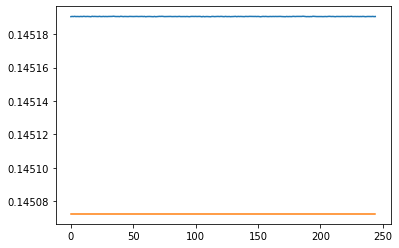

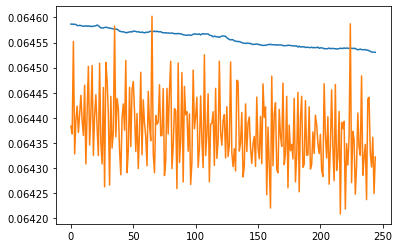

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure()
plt.plot(mae[5:])
plt.plot(val_mae[5:])

fig = plt.figure()
plt.plot(loss[5:])
plt.plot(val_loss[5:])

In [25]:
p = np.array([0.0809445536028982,0.360231847343495,0.05705586985086575,0.7492594693373473,0.9557203473787999,0.8075420557189864,0.632065002977318,0.9871984916579648,0.8587772618985282,0.7475151080229132,0.6025248789917205,0.4934736302468893,0.1134059730814918,0.38151935090764855,0.06163974737265665,0.001773285305271432,0.7716002734365476,0.35787259705535823]).reshape(-1,18)
p_new = model.predict(-50000000*p)
print(p_new[1])

IndexError: index 1 is out of bounds for axis 0 with size 1